# Предобработка данных

In [1684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1685]:
orders_data = pd.read_csv('train.csv')
orders_data.head()

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,36.0,Male,0
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,Tavern_district_4,7,2.5,-3,14,3.5,-3,5,29.0,Female,1
2,34822849,2016-02-18,2015-11-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_6,7,2.5,-3,8,2.5,-3,5,56.0,Female,0
3,46893387,2016-04-30,2016-03-22,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,13,2.5,-2,5,2.5,-3,5,27.0,Female,0
4,67128275,2016-09-19,2016-07-21,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,39,2.5,-3,7,2.5,-3,5,37.0,Female,0


In [1686]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 3168 non-null   int64  
 1   Deal_date               3168 non-null   object 
 2   First_deal_date         3168 non-null   object 
 3   Secret_dwarf_info_1     535 non-null    float64
 4   Secret_dwarf_info_2     535 non-null    float64
 5   Secret_dwarf_info_3     535 non-null    float64
 6   First_default_date      535 non-null    object 
 7   Successful_deals_count  3154 non-null   float64
 8   Region                  3161 non-null   object 
 9   Tavern                  3168 non-null   int64  
 10  Hashed_deal_detail_1    3168 non-null   float64
 11  Hashed_deal_detail_2    3168 non-null   int64  
 12  Hashed_deal_detail_3    3168 non-null   int64  
 13  Hashed_deal_detail_4    3168 non-null   float64
 14  Hashed_deal_detail_5    3168 non-null   

Как видно, в датасете есть категориальные данные, которые нужно преобразовать, чтобы модель могла с ними работать, а также пропуски, от которых надо избавиться или заполнить.

In [1687]:
orders_data.describe()

,Deal_id,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,Successful_deals_count,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Default
count,3.168000e+03,535.000000,535.000000,535.000000,3154.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.0,3168.000000,3168.000000
mean,4.605727e+07,3.935514,-2.299065,5.267290,1.043754,13.350694,2.518939,-2.404356,8.462437,3.193813,-2.981692,5.0,36.411616,0.110795
std,5.370953e+07,0.888467,0.734579,0.498645,1.649416,8.851891,0.351308,2.474564,3.521127,2.048743,0.245540,0.0,10.821444,0.313928
min,5.856790e+05,2.500000,-3.000000,5.000000,0.000000,2.000000,2.500000,-3.000000,5.000000,2.500000,-3.000000,5.0,20.000000,0.000000
25%,2.761608e+07,3.500000,-3.000000,5.000000,0.000000,7.000000,2.500000,-3.000000,6.000000,2.500000,-3.000000,5.0,28.000000,0.000000
50%,4.349426e+07,3.500000,-2.000000,5.000000,0.000000,8.000000,2.500000,-3.000000,8.000000,2.500000,-3.000000,5.0,34.000000,0.000000
75%,5.778544e+07,4.500000,-2.000000,5.000000,2.000000,15.000000,2.500000,-3.000000,10.000000,2.500000,-3.000000,5.0,43.000000,0.000000
max,6.927701e+08,9.500000,2.000000,8.000000,17.000000,58.000000,17.500000,78.000000,29.000000,37.500000,4.000000,5.0,72.000000,1.000000


Свойство "Hashed_deal_detail_6" содержит только значения 5, значит им можно пренебречь.

In [1688]:
print(orders_data.shape)
orders_data.drop(['Hashed_deal_detail_6'], axis = 1, inplace = True)
orders_data.shape

(3168, 19)


(3168, 18)

## Анализ засекреченных признаков по заказу

### 'Hashed_deal_detail_5'

In [1689]:
orders_data['Hashed_deal_detail_5'].value_counts()

Hashed_deal_detail_5
-3    3139
-2      19
 1       3
 2       2
-1       2
 0       2
 4       1
Name: count, dtype: int64

Значение -3 в преобладает, причём очень, очень сильно, этот столбец нужно будет удалить, если он никакой информации из себя не представляет или преобразовать его.

In [1690]:
print('Значение столбца  /  Вероятность дефолта гнома')

for el in sorted(orders_data['Hashed_deal_detail_5'].unique()):
  cnt_el = orders_data[orders_data['Hashed_deal_detail_5']==el].count()[0]
  cnt_default_el = orders_data[orders_data['Hashed_deal_detail_5']==el]['Default'].sum()
  probability_default_el = cnt_default_el/cnt_el
  print('      ', el,'            ', probability_default_el)

Значение столбца  /  Вероятность дефолта гнома
       -3              0.11054475947754062
       -2              0.10526315789473684
       -1              0.0
       0              0.0
       1              0.6666666666666666
       2              0.0
       4              0.0


Как видно из "псевдотаблицы", если значение элемента равно 1, то вероятность того, что этот заказ дефолтнет равна 66,6%. В этом столбце всё нормально, в преобразовании он не нуждается, в удалении то же, так как несёт в себе какую-то информацию.

### 'Hashed_deal_detail_4'

In [1691]:
orders_data['Hashed_deal_detail_4'].value_counts()

Hashed_deal_detail_4
2.5     2562
3.5      176
4.5      108
5.5      102
6.5       56
8.5       44
7.5       40
9.5       19
10.5      14
12.5      12
11.5      12
13.5       7
14.5       6
17.5       2
18.5       2
32.5       1
16.5       1
37.5       1
19.5       1
21.5       1
15.5       1
Name: count, dtype: int64

И в этом столбце одной из значений сильно преобладает над другими.

In [1692]:
print('Значение столбца  /  Вероятность дефолта гнома')

a = []

for el in sorted(orders_data['Hashed_deal_detail_4'].unique()):
  cnt_el = orders_data[orders_data['Hashed_deal_detail_4']==el].count()[0]
  cnt_default_el = orders_data[orders_data['Hashed_deal_detail_4']==el]['Default'].sum()
  probability_default_el = cnt_default_el/cnt_el

  if el != 2.5:
    a.append(probability_default_el)

  print('      ', el,'            ', probability_default_el)

Значение столбца  /  Вероятность дефолта гнома
       2.5              0.11826697892271663
       3.5              0.13068181818181818
       4.5              0.12037037037037036
       5.5              0.06862745098039216
       6.5              0.03571428571428571
       7.5              0.025
       8.5              0.022727272727272728
       9.5              0.0
       10.5              0.0
       11.5              0.0
       12.5              0.08333333333333333
       13.5              0.0
       14.5              0.0
       15.5              0.0
       16.5              0.0
       17.5              0.0
       18.5              0.0
       19.5              0.0
       21.5              0.0
       32.5              0.0
       37.5              0.0


Самая большая вероятность дефолта по заказу, в котором значение анализируемой фичи равно 3.5, а именно 13%. Вцелом, данные в обработке не нуждаются.

### 'Hashed_deal_detail_3'

In [1693]:
orders_data['Hashed_deal_detail_3'].value_counts()

Hashed_deal_detail_3
5     723
8     460
6     428
7     369
11    236
9     233
10    205
12    114
13     92
14     88
15     68
17     40
16     31
18     25
19     18
20     12
21     10
23      6
22      3
25      2
24      2
29      2
26      1
Name: count, dtype: int64

Здесь данные как никак, но распределены получше прошлых случаев.

In [1694]:
print('Значение столбца  /  Вероятность дефолта гнома')

for el in orders_data['Hashed_deal_detail_3'].unique():
  cnt_el = orders_data[orders_data['Hashed_deal_detail_3']==el].count()[0]
  cnt_default_el = orders_data[orders_data['Hashed_deal_detail_3']==el]['Default'].sum()
  probability_default_el = cnt_default_el/cnt_el
  print('      ', el,'            ', probability_default_el)

Значение столбца  /  Вероятность дефолта гнома
       8              0.10434782608695652
       14              0.06818181818181818
       5              0.09405255878284924
       7              0.14634146341463414
       15              0.10294117647058823
       12              0.08771929824561403
       10              0.09268292682926829
       6              0.19158878504672897
       9              0.09871244635193133
       16              0.0
       11              0.09322033898305085
       17              0.025
       19              0.1111111111111111
       20              0.0
       13              0.05434782608695652
       18              0.08
       23              0.16666666666666666
       21              0.1
       22              0.0
       25              0.0
       24              0.0
       29              0.0
       26              0.0


Здесь ситуациия лучше прошлых свойств. Есть элементы, при которых вероятность дефолта в предоставленных данных равна 0(если в предоставленных данных была бы только одна эта фича), а остальные элементы +-с одинаковой вероятностью влияют на вероятность дефолта.

### 'Hashed_deal_detail_2'

In [1695]:
orders_data['Hashed_deal_detail_2'].value_counts()

Hashed_deal_detail_2
-3     2736
-2      108
-1       76
 0       70
 1       37
 2       31
 3       26
 4       22
 5       12
 6       12
 9        8
 8        6
 7        5
 15       4
 14       3
 11       3
 10       2
 13       2
 19       1
 20       1
 78       1
 12       1
 21       1
Name: count, dtype: int64

Ещё один столбец с сильно преобладающим над другими жлементами значением.

In [1696]:
print('Значение столбца  /  Вероятность дефолта гнома')

for el in orders_data['Hashed_deal_detail_2'].unique():
  cnt_el = orders_data[orders_data['Hashed_deal_detail_2']==el].count()[0]
  cnt_default_el = orders_data[orders_data['Hashed_deal_detail_2']==el]['Default'].sum()
  probability_default_el = cnt_default_el/cnt_el
  print('      ', el,'            ', probability_default_el)

Значение столбца  /  Вероятность дефолта гнома
       -3              0.10964912280701754
       -2              0.12962962962962962
       -1              0.17105263157894737
       0              0.08571428571428572
       2              0.12903225806451613
       4              0.045454545454545456
       5              0.08333333333333333
       13              0.0
       1              0.1891891891891892
       10              0.5
       3              0.07692307692307693
       9              0.0
       14              0.0
       7              0.0
       19              0.0
       6              0.08333333333333333
       11              0.3333333333333333
       20              0.0
       8              0.0
       15              0.0
       78              0.0
       12              0.0
       21              0.0


Есть значения, в разрезе которых не было дефолта по заказу, элементы, с +- одинаковой вероятность дефолта, и значение, при котором 33% заказов заканчиваются дефолтом.

### 'Hashed_deal_detail_1'

In [1697]:
orders_data['Hashed_deal_detail_1'].value_counts()

Hashed_deal_detail_1
2.5     3147
3.5       10
4.5        4
5.5        3
7.5        2
10.5       1
17.5       1
Name: count, dtype: int64

In [1698]:
print('Значение столбца  /  Вероятность дефолта гнома')

for el in sorted(orders_data['Hashed_deal_detail_1'].unique()):
  cnt_el = orders_data[orders_data['Hashed_deal_detail_1']==el].count()[0]
  cnt_default_el = orders_data[orders_data['Hashed_deal_detail_1']==el]['Default'].sum()
  probability_default_el = cnt_default_el/cnt_el
  print('      ', el,'            ', probability_default_el)

Значение столбца  /  Вероятность дефолта гнома
       2.5              0.11121703209405784
       3.5              0.0
       4.5              0.0
       5.5              0.0
       7.5              0.0
       10.5              0.0
       17.5              1.0


## Анализ засекреченных признаков по гному


Всего в даных три засекреченных признака по гному, в них есть пропуски, причём одинаковое количество, всего их 535. Если нет данных об каком-то одном из этих фичей в строке, то в других информация то же отсутствует. Так же скорее всего эти признаки связаны с информацией об первом дефолте гнома, так как если записана дата первого деофлта гнома, то и есть информация о трёх секрытных признаках. А ещй количество не пропущенных значений в засакреченных признаках по гному равно не пропущенным значениям фиче даты первого дефолта, 535 и 535 соответственно.

In [1699]:
orders_data['Secret_dwarf_info_1'].value_counts().sum() == orders_data['First_default_date'].value_counts().sum() == 535

True

Просмотрим веероятности дефолта для каждого значения каждого из признаков.

In [1700]:
for i in '123':
  print(f"Для 'Secret_dwarf_info_{i}'")
  for el in orders_data[f'Secret_dwarf_info_{i}'].unique():
    cnt_el = orders_data[orders_data[f'Secret_dwarf_info_{i}']==el].count()[0]
    cnt_default_el = orders_data[orders_data[f'Secret_dwarf_info_{i}']==el]['Default'].sum()
    probability_default_el = cnt_default_el/cnt_el
    print('      ', el,'            ', probability_default_el)

print("Для 'First_default_date'")
for el in orders_data['First_default_date'].unique():
    cnt_el = orders_data[orders_data[f'First_default_date']==el].count()[0]
    cnt_default_el = orders_data[orders_data[f'First_default_date']==el]['Default'].sum()
    probability_default_el = cnt_default_el/cnt_el
    print('      ', el,'            ', probability_default_el)


print('Вероятность дефолта, если пропуск данных, и для каждого из четырёх признаков оно будет одинаково:')

nan_mask = pd.isna(orders_data['Secret_dwarf_info_1'])
print('      ',orders_data[nan_mask]['Default'].sum()/(orders_data.shape[0]-535))

Для 'Secret_dwarf_info_1'
       nan              nan
       3.5              0.1875
       4.5              0.30337078651685395
       5.5              0.3333333333333333
       6.5              0.09090909090909091
       8.5              0.0
       2.5              0.25
       7.5              0.5
       9.5              0.0
Для 'Secret_dwarf_info_2'
       nan              nan
       -2.0              0.24691358024691357
       -3.0              0.16379310344827586
       -1.0              0.3137254901960784
       2.0              0.0
       0.0              0.2857142857142857
       1.0              0.0
Для 'Secret_dwarf_info_3'
       nan              nan
       5.0              0.19753086419753085
       6.0              0.288135593220339
       7.0              0.18181818181818182
       8.0              0.0
Для 'First_default_date'
       nan              nan
       2016-07-30              0.2857142857142857
       2016-05-20              0.16666666666666666
       2016-05-19 

<ipython-input-1700-4ae5ae4e8d54>:6: RuntimeWarning: invalid value encountered in scalar divide
  probability_default_el = cnt_default_el/cnt_el
<ipython-input-1700-4ae5ae4e8d54>:6: RuntimeWarning: invalid value encountered in scalar divide
  probability_default_el = cnt_default_el/cnt_el
<ipython-input-1700-4ae5ae4e8d54>:6: RuntimeWarning: invalid value encountered in scalar divide
  probability_default_el = cnt_default_el/cnt_el
<ipython-input-1700-4ae5ae4e8d54>:13: RuntimeWarning: invalid value encountered in scalar divide
  probability_default_el = cnt_default_el/cnt_el


2015-10-13              0.3333333333333333
       2015-06-10              1.0
       2016-05-30              0.07142857142857142
       2015-06-30              0.14285714285714285
       2015-10-20              0.14285714285714285
       2016-08-20              0.2
       2015-12-13              0.26666666666666666
       2016-03-01              0.36363636363636365
       2016-01-22              0.26666666666666666
       2015-07-13              0.0
       2015-10-30              0.25
       2016-03-13              0.6
       2016-02-13              0.2
       2015-08-30              0.3333333333333333
       2015-12-20              0.23076923076923078
       2016-06-20              0.0
       2016-01-01              0.3333333333333333
       2016-04-22              0.2
       2015-11-06              0.5555555555555556
       2015-07-20              0.2727272727272727
       2016-05-09              0.0
       2015-05-30              0.25
       2015-08-07              0.666666666666666

Каждый из признаков несёт в себя разную непонятную информация, можно удалить все 4 и заменить на индикатор, где пропуск равен нулю, а любое какое-то значение единице или заменить пропуски на какое-то, а остальное в признаках оставить не изменёным.
Предположу, что замена всех четырёх признаков на индикатор присутствия данных или отсутствия данных будет лучше если нет то можно будет исправить позже  

In [1701]:
#индикатор
orders_data['Secrets_info_nan'] = 1

orders_data.loc[orders_data['Secret_dwarf_info_1'].isna(), 'Secrets_info_nan'] = 0

In [1702]:
secrets_info = orders_data[['Secret_dwarf_info_1', 'Secret_dwarf_info_2', 'Secret_dwarf_info_3', 'First_default_date']]
orders_data.drop(['Secret_dwarf_info_1', 'Secret_dwarf_info_2', 'Secret_dwarf_info_3', 'First_default_date'], axis = 1, inplace = True)

Удалим эти свойства из основного датасета и перенесём в другой и воспользуемся, если метрика с ними будет лучше.

## Работа над категориальными данными

### 'Region'

In [1703]:
orders_data['Region'].value_counts().sum()

3161

Как видно здесь есть пропуски, избавимся от них путём замены на моду, так как это категориальные данные.

In [1704]:
orders_data['Region'].mode()[0]

'Tavern_district_3'

In [1705]:
orders_data['Region'] = orders_data['Region'].fillna(orders_data['Region'].mode()[0])
print(orders_data['Region'].isna().sum())
orders_data['Region'].value_counts().sum()

0


3168

Так как пропуски из фичи "Region" были заменены, то создадим бинарные колонки для дистриктов вместо категориального признака "Region". Если клиент, сделавший этот заказ, сделал его в таверне дистректа 3, то в значении для дистректа 3 будет стоять единица, а для остальных дистректов 0.

In [1706]:
region_cols = pd.get_dummies(orders_data['Region'], dtype = 'int')
region_cols.head()

,Tavern_district_0,Tavern_district_1,Tavern_district_2,Tavern_district_3,Tavern_district_4,Tavern_district_5,Tavern_district_6,Tavern_district_7
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0


Количество значений осталось то же самое.

In [1707]:
region_cols.value_counts().sum()

3168

### 'Tavern'

Тип таверны то же категориальный признак, поступим с ним так же, как с дистриктом таверн. В них нет пропусков.

In [1708]:
tavern_cols = pd.get_dummies(orders_data['Tavern'], dtype = 'int64')
tavern_cols.columns = tavern_cols.columns.astype(str) #названия столбцов в пандас должны быть строками, а не числами
tavern_cols

,2,7,8,10,13,15,17,18,22,23,26,27,39,43,44,45,47,49,58
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3164,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3165,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3166,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1709]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 3168 non-null   int64  
 1   Deal_date               3168 non-null   object 
 2   First_deal_date         3168 non-null   object 
 3   Successful_deals_count  3154 non-null   float64
 4   Region                  3168 non-null   object 
 5   Tavern                  3168 non-null   int64  
 6   Hashed_deal_detail_1    3168 non-null   float64
 7   Hashed_deal_detail_2    3168 non-null   int64  
 8   Hashed_deal_detail_3    3168 non-null   int64  
 9   Hashed_deal_detail_4    3168 non-null   float64
 10  Hashed_deal_detail_5    3168 non-null   int64  
 11  Age                     3168 non-null   float64
 12  Gender                  3168 non-null   object 
 13  Default                 3168 non-null   int64  
 14  Secrets_info_nan        3168 non-null   

### 'Gender'

Заменим значения "Male" и "Female" в столбце "Gender" на 0 и 1 соответственно.

In [1710]:
orders_data['Gender'].replace('Male', 0, inplace = True)
orders_data['Gender'].replace('Female', 1, inplace = True)
orders_data['Gender'].head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

## Оставшиеся пропуски в данных

### 'Successful_deals_count'

In [1711]:
orders_data['Successful_deals_count'].value_counts().isna().count()

14

Так это не катагориальные данные, а количество оплаченных заказов, то можно заменить на среднее значение, но он скорее всего будет дробным, так что нужно будет округлить, потому что нецелое количество заказов не бывает.

In [1712]:
print(orders_data['Successful_deals_count'].mean())
orders_data['Successful_deals_count'].value_counts()

1.0437539632213062


Successful_deals_count
0.0     1903
2.0      592
3.0      244
1.0      194
4.0      105
5.0       52
6.0       23
7.0       13
8.0        9
9.0        8
10.0       6
17.0       2
12.0       2
11.0       1
Name: count, dtype: int64

In [1713]:
orders_data['Successful_deals_count'].fillna(int(orders_data['Successful_deals_count'].mean()), inplace = True)
orders_data['Successful_deals_count'].value_counts()

Successful_deals_count
0.0     1903
2.0      592
3.0      244
1.0      208
4.0      105
5.0       52
6.0       23
7.0       13
8.0        9
9.0        8
10.0       6
17.0       2
12.0       2
11.0       1
Name: count, dtype: int64

## Обработка дат

Я уже немного поработал с данными и построил некоторые модели и все из них лучше себя чувствовали, если даты были переведены в кварталы.

In [1714]:
date_columns = ['Deal_date', 'First_deal_date']

for col in date_columns:
  orders_data[col] = pd.to_datetime(orders_data[col], format='%Y-%m-%d') #'%Y-%m-%d'

for col in date_columns:
  orders_data[col] = orders_data[col].astype(np.int64) // (10**9*3600*24*30*4)

orders_data.head()

,Deal_id,Deal_date,First_deal_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,Default,Secrets_info_nan
0,22487461,139,138,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,36.0,0,0,0
1,62494261,141,139,2.0,Tavern_district_4,7,2.5,-3,14,3.5,-3,29.0,1,1,1
2,34822849,140,139,0.0,Tavern_district_6,7,2.5,-3,8,2.5,-3,56.0,1,0,0
3,46893387,141,140,0.0,Tavern_district_2,13,2.5,-2,5,2.5,-3,27.0,1,0,0
4,67128275,142,141,0.0,Tavern_district_4,39,2.5,-3,7,2.5,-3,37.0,1,0,0


# Деление данных на тренировочные и тестовые

Мне лень каждый раз записывать, что и почему я сделал для улучшения модели, так что сразу перейдём к финальной версии.

In [1715]:
secrets_info.drop(['First_default_date'], axis = 1, inplace = True) #удаляем дату первого дефолта, так как проверив она оказалсь не очень информативной

#заменяем пропуски на ноль
secrets_info['Secret_dwarf_info_1'].fillna(0, inplace = True)
secrets_info['Secret_dwarf_info_2'].fillna(0, inplace = True)
secrets_info['Secret_dwarf_info_3'].fillna(0, inplace = True)
secrets_info.head()

<ipython-input-1715-cc3f96b593f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secrets_info.drop(['First_default_date'], axis = 1, inplace = True) #удаляем дату первого дефолта, так как проверив она оказалсь не очень информативной
<ipython-input-1715-cc3f96b593f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secrets_info['Secret_dwarf_info_1'].fillna(0, inplace = True)
<ipython-input-1715-cc3f96b593f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3
0,0.0,0.0,0.0
1,3.5,-2.0,5.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [1716]:
#удалим таргетную перменную и номера заказов, а так же категориальные признаки,
#которые заменили на бинарные колонки

dataframe = orders_data.drop(['Deal_id', 'Default', 'Region', 'Tavern'], axis = 1)

X = pd.concat([dataframe, region_cols, tavern_cols, secrets_info], axis = 1)

y = orders_data['Default']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_date               3168 non-null   int64  
 1   First_deal_date         3168 non-null   int64  
 2   Successful_deals_count  3168 non-null   float64
 3   Hashed_deal_detail_1    3168 non-null   float64
 4   Hashed_deal_detail_2    3168 non-null   int64  
 5   Hashed_deal_detail_3    3168 non-null   int64  
 6   Hashed_deal_detail_4    3168 non-null   float64
 7   Hashed_deal_detail_5    3168 non-null   int64  
 8   Age                     3168 non-null   float64
 9   Gender                  3168 non-null   int64  
 10  Secrets_info_nan        3168 non-null   int64  
 11  Tavern_district_0       3168 non-null   int64  
 12  Tavern_district_1       3168 non-null   int64  
 13  Tavern_district_2       3168 non-null   int64  
 14  Tavern_district_3       3168 non-null   

In [1717]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.head()

,Deal_date,First_deal_date,Successful_deals_count,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,...,39,43,44,45,47,49,58,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3
1135,142,141,2.0,2.5,-3,10,2.5,-3,29.0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2912,139,137,4.0,2.5,1,7,2.5,-3,34.0,1,...,0,0,0,0,0,0,0,4.5,-2.0,5.0
179,140,139,2.0,2.5,1,5,2.5,-3,45.0,1,...,0,0,0,0,0,0,0,3.5,-3.0,5.0
834,139,138,0.0,2.5,-3,9,2.5,-3,20.0,1,...,0,0,0,0,0,0,0,3.5,-3.0,5.0
842,141,139,0.0,2.5,-3,9,2.5,-3,65.0,1,...,0,0,0,0,0,0,0,0.0,0.0,0.0


# Knn

In [1718]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=48) #лучший параметр удавшийся подобрать
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=48)

## Roc-кривая для тестовых данных

0.7284444883792452


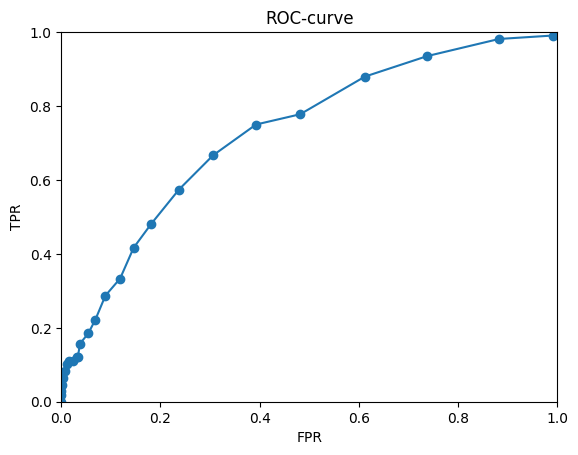

In [1719]:
pred_proba_knn_test = knn.predict_proba(X_test)

from sklearn.metrics import auc, roc_curve

fpr_knn_test, tpr_knn_test, thr_knn_test = roc_curve(y_test, pred_proba_knn_test[:,1])

plt.plot(fpr_knn_test, tpr_knn_test, marker = 'o')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fpr_knn_test, tpr_knn_test))

## Roc-кривая для тренировочных данных

0.7569462685695941


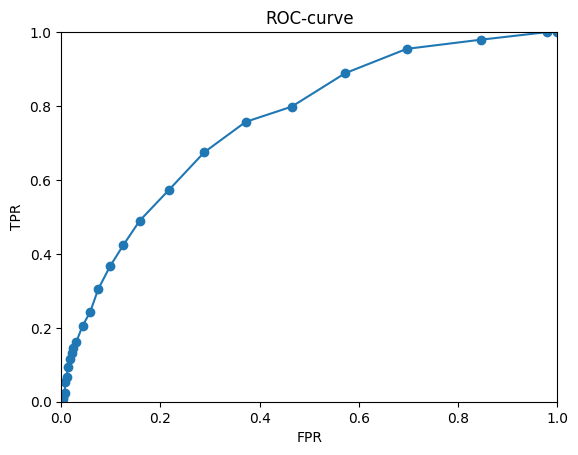

In [1720]:
pred_proba_knn_train = knn.predict_proba(X_train)


from sklearn.metrics import auc, roc_curve

fpr_knn_train, tpr_knn_train, thr_knn_train = roc_curve(y_train, pred_proba_knn_train[:,1])

plt.plot(fpr_knn_train, tpr_knn_train, marker = 'o')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fpr_knn_train, tpr_knn_train))

Модель не переобучилась.

# Логистическая регрессия для классификации

In [1721]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Roc-кривая для тестовых данных

0.7302293396599446


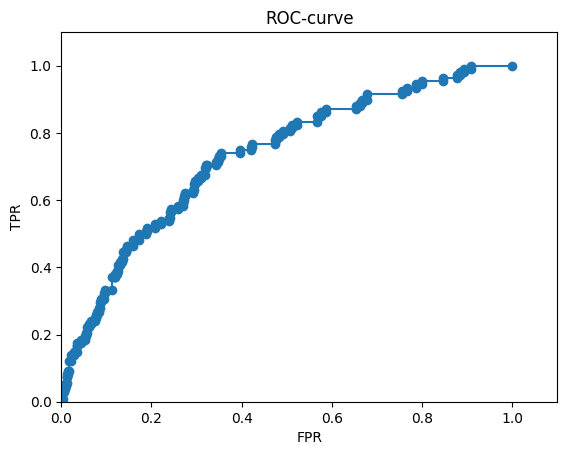

In [1722]:
pred_proba_log = log.predict_proba(X_test)

fpr_log_test, tpr_log_test, thr_log_test = roc_curve(y_test, pred_proba_log[:,1])

plt.plot(fpr_log_test, tpr_log_test, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fpr_log_test, tpr_log_test))

## Roc-кривая для тренировочных данных

0.778059214229427


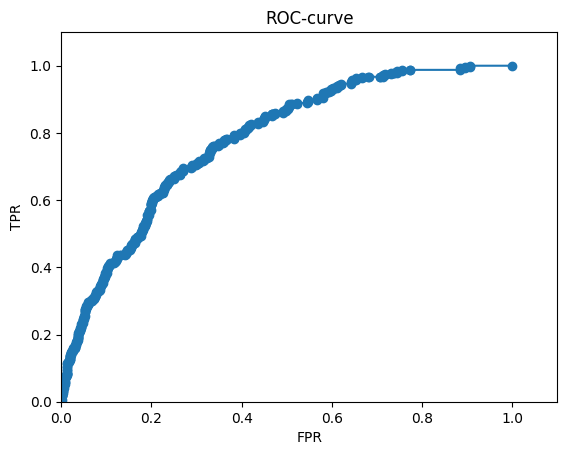

In [1723]:
pred_proba_log_train = log.predict_proba(X_train)


fpr_log_train, tpr_log_train, thr_log_train = roc_curve(y_train, pred_proba_log_train[:,1])

plt.plot(fpr_log_train, tpr_log_train, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fpr_log_train, tpr_log_train))

На файле test.csv будет скорее всего лучшей, если только переобученный градиентный бустинг не обойдёт её.

# Дерево решений

In [1724]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=12, min_samples_split = 18, max_leaf_nodes=15, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=15, min_samples_split=18,
                       random_state=42)

## Roc-кривая для тестовых данных

0.6814177760203857


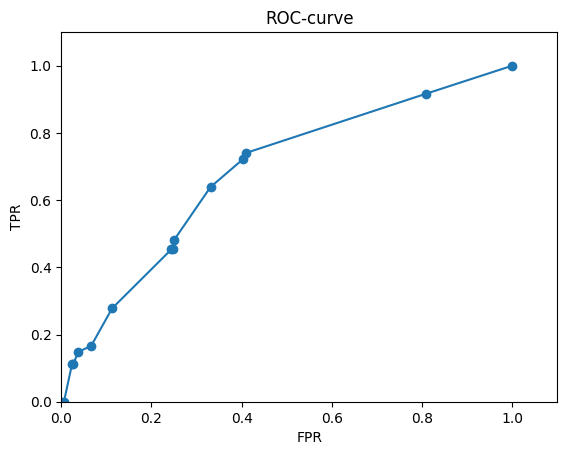

In [1725]:
pred_proba_tree_test = tree.predict_proba(X_test)

fpr_tree_test, tpr_tree_test, thr_tree_test = roc_curve(y_test, pred_proba_tree_test[:,1])

plt.plot(fpr_tree_test, tpr_tree_test, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fpr_tree_test, tpr_tree_test))

## Roc-кривая для тренировочных данных

0.7461974808310505


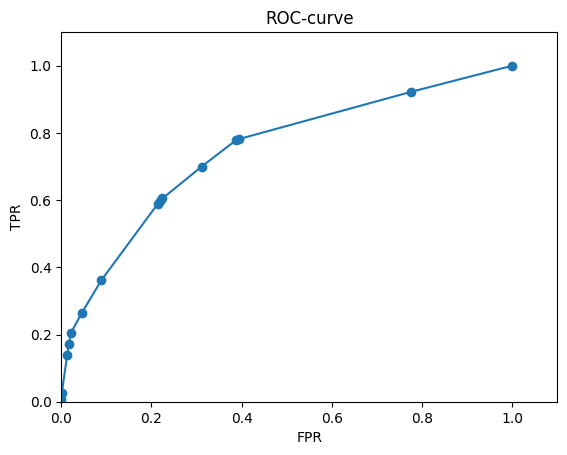

In [1726]:
pred_proba_tree_train = tree.predict_proba(X_train)


fpr_tree_train, tpr_tree_train, thr_tree_train = roc_curve(y_train, pred_proba_tree_train[:,1])

plt.plot(fpr_tree_train, tpr_tree_train, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fpr_tree_train, tpr_tree_train))

# Градиентный бустинг

In [1727]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(n_estimators = 50, min_samples_leaf = 20, random_state = 42)
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_leaf=20, n_estimators=50,
                           random_state=42)

## Roc-кривая для тестовых данных

0.7308609024208074


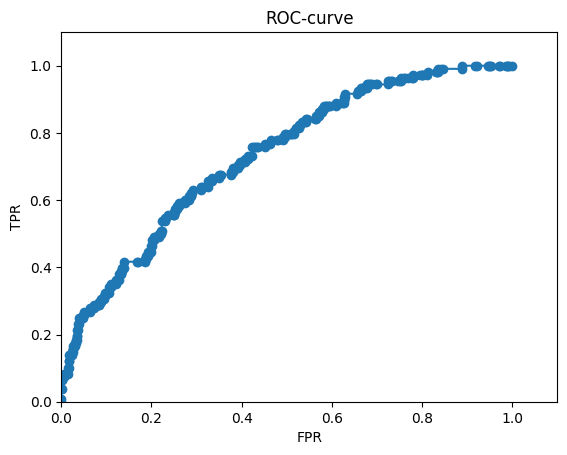

In [1728]:
pred_proba_grad_boost_test = grad_boost.predict_proba(X_test)

fpr_grad_test, tpr_grad_test, thr_grad_test = roc_curve(y_test, pred_proba_grad_boost_test[:,1])

plt.plot(fpr_grad_test, tpr_grad_test, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fpr_grad_test, tpr_grad_test))

## Roc-кривая для тренировочных данных

0.845776993925142


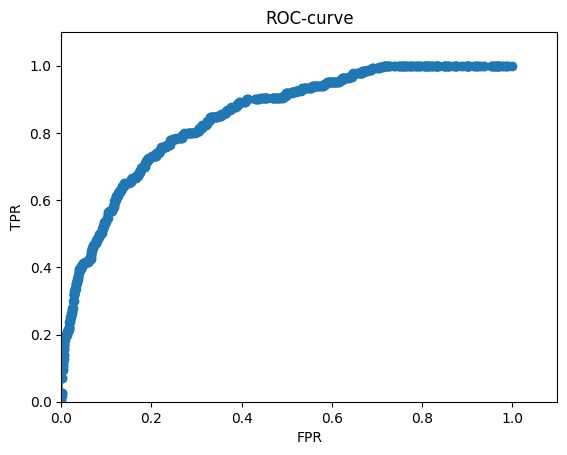

In [1729]:
pred_proba_grad_boost_train = grad_boost.predict_proba(X_train)

fpr_train, tpr_train, thr_train = roc_curve(y_train, pred_proba_grad_boost_train[:,1])

plt.plot(fpr_train, tpr_train, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fpr_train, tpr_train))

Градиентный бустинг переобучился, поэтому модель логистической регресси будет получше.

# Финанльные модели и обработаный датасет test.csv для проверки метрик

## Обработка данных

In [1730]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender
0,72875713,2016-10-14,2015-09-20,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,7,2.5,-3,18,2.5,-3,5,40.0,Female
1,75825544,2016-10-23,2015-06-16,NaN,NaN,NaN,NaN,6.0,Tavern_district_3,18,2.5,-2,15,3.5,-3,5,66.0,Female
2,81809181,2016-11-17,2016-09-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,7,2.5,-3,5,36.0,Female
3,87083256,2016-12-26,2016-06-25,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,7,2.5,-2,6,2.5,2,5,32.0,Female
4,84651519,2016-12-07,2016-10-15,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,6,2.5,-3,5,37.0,Female


In [1731]:
test_data['Secrets_info_nan'] = 1

test_data.loc[test_data['Secret_dwarf_info_1'].isna(), 'Secrets_info_nan'] = 0

secrets_info2 = test_data[['Secret_dwarf_info_1', 'Secret_dwarf_info_2', 'Secret_dwarf_info_3', 'First_default_date']]
test_data.drop(['Secret_dwarf_info_1', 'Secret_dwarf_info_2', 'Secret_dwarf_info_3', 'First_default_date'], axis = 1, inplace = True)

In [1732]:
test_data['Gender'].replace('Male', 0, inplace = True)
test_data['Gender'].replace('Female', 1, inplace = True)

In [1733]:
tavern_cols2 = pd.get_dummies(test_data['Tavern'], dtype = 'int64')
tavern_cols2.columns = tavern_cols2.columns.astype(str) #названия столбцов в пандас должны быть строками, а не числами
tavern_cols2

,7,8,13,15,17,18,26,27,39,43,44,45,47,49,58,61,77,79,81
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
985,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
986,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
987,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


У регионов нет пропусков.

In [1734]:
region_cols2 = pd.get_dummies(test_data['Region'], dtype = 'int')
region_cols2.head()

,Tavern_district_0,Tavern_district_1,Tavern_district_2,Tavern_district_3,Tavern_district_4,Tavern_district_5,Tavern_district_6,Tavern_district_7
0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0


In [1735]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 989 non-null    int64  
 1   Deal_date               989 non-null    object 
 2   First_deal_date         989 non-null    object 
 3   Successful_deals_count  988 non-null    float64
 4   Region                  985 non-null    object 
 5   Tavern                  989 non-null    int64  
 6   Hashed_deal_detail_1    989 non-null    float64
 7   Hashed_deal_detail_2    989 non-null    int64  
 8   Hashed_deal_detail_3    989 non-null    int64  
 9   Hashed_deal_detail_4    989 non-null    float64
 10  Hashed_deal_detail_5    989 non-null    int64  
 11  Hashed_deal_detail_6    989 non-null    int64  
 12  Age                     989 non-null    float64
 13  Gender                  989 non-null    int64  
 14  Secrets_info_nan        989 non-null    in

Пропусков в данных нет

In [1736]:
print(test_data.shape)
test_data.drop(['Hashed_deal_detail_6'], axis = 1, inplace = True)
test_data.shape

(989, 15)


(989, 14)

In [1737]:
test_data.head()

,Deal_id,Deal_date,First_deal_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,Secrets_info_nan
0,72875713,2016-10-14,2015-09-20,0.0,Tavern_district_2,7,2.5,-3,18,2.5,-3,40.0,1,0
1,75825544,2016-10-23,2015-06-16,6.0,Tavern_district_3,18,2.5,-2,15,3.5,-3,66.0,1,0
2,81809181,2016-11-17,2016-09-11,0.0,Tavern_district_3,7,2.5,-3,7,2.5,-3,36.0,1,0
3,87083256,2016-12-26,2016-06-25,0.0,Tavern_district_4,7,2.5,-2,6,2.5,2,32.0,1,0
4,84651519,2016-12-07,2016-10-15,0.0,Tavern_district_3,7,2.5,-3,6,2.5,-3,37.0,1,0


In [1738]:
date_columns = ['Deal_date', 'First_deal_date']

for col in date_columns:
  test_data[col] = pd.to_datetime(test_data[col], format='%Y-%m-%d') #'%Y-%m-%d'

for col in date_columns:
  test_data[col] = test_data[col].astype(np.int64) // (10**9*3600*24*30*4)

test_data.head()

,Deal_id,Deal_date,First_deal_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,Secrets_info_nan
0,72875713,142,139,0.0,Tavern_district_2,7,2.5,-3,18,2.5,-3,40.0,1,0
1,75825544,142,138,6.0,Tavern_district_3,18,2.5,-2,15,3.5,-3,66.0,1,0
2,81809181,142,142,0.0,Tavern_district_3,7,2.5,-3,7,2.5,-3,36.0,1,0
3,87083256,143,141,0.0,Tavern_district_4,7,2.5,-2,6,2.5,2,32.0,1,0
4,84651519,142,142,0.0,Tavern_district_3,7,2.5,-3,6,2.5,-3,37.0,1,0


In [1739]:
secrets_info2.drop(['First_default_date'], axis = 1, inplace = True) #удаляем дату первого дефолта, так как проверив она оказалсь не очень информативной

secrets_info['Secret_dwarf_info_1'].fillna(0, inplace = True)
secrets_info['Secret_dwarf_info_2'].fillna(0, inplace = True)
secrets_info['Secret_dwarf_info_3'].fillna(0, inplace = True)
secrets_info.head()

<ipython-input-1739-d2cb07aca924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secrets_info2.drop(['First_default_date'], axis = 1, inplace = True) #удаляем дату первого дефолта, так как проверив она оказалсь не очень информативной
<ipython-input-1739-d2cb07aca924>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secrets_info['Secret_dwarf_info_1'].fillna(0, inplace = True)
<ipython-input-1739-d2cb07aca924>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3
0,0.0,0.0,0.0
1,3.5,-2.0,5.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


## Обработанный датасет

In [1744]:
orders_data['61'] = 0 #добавление в датасет для тренировки типов таверн, которые есть в тестовом файле, но нет в тренировочном
orders_data['77'] = 0
orders_data['79'] = 0
orders_data['81'] = 0

dataframe = orders_data.drop(['Deal_id', 'Default', 'Region', 'Tavern'], axis = 1)

X = pd.concat([dataframe, region_cols, tavern_cols, secrets_info], axis = 1)

y = orders_data['Default']


test_data['10'] = 0 #добавление в датасет для теста типов таверн, которые есть в ттренировочном файле, но нет в тестовом
test_data['2'] = 0
test_data['22'] = 0
test_data['23'] = 0

dataframe2 = test_data.drop(['Deal_id', 'Region', 'Tavern'], axis = 1)

X_final = pd.concat([dataframe2, region_cols2, tavern_cols2, secrets_info2], axis = 1)

#таргетную переменную сюда y_final

X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_date               989 non-null    int64  
 1   First_deal_date         989 non-null    int64  
 2   Successful_deals_count  988 non-null    float64
 3   Hashed_deal_detail_1    989 non-null    float64
 4   Hashed_deal_detail_2    989 non-null    int64  
 5   Hashed_deal_detail_3    989 non-null    int64  
 6   Hashed_deal_detail_4    989 non-null    float64
 7   Hashed_deal_detail_5    989 non-null    int64  
 8   Age                     989 non-null    float64
 9   Gender                  989 non-null    int64  
 10  Secrets_info_nan        989 non-null    int64  
 11  10                      989 non-null    int64  
 12  2                       989 non-null    int64  
 13  22                      989 non-null    int64  
 14  23                      989 non-null    in

In [1745]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 42)
log.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [1746]:
pred_proba_log = log.predict_proba(X_final)
'''
fpr_log_test, tpr_log_test, thr_log_test = roc_curve(y_final, pred_proba_log[:,1])

plt.plot(fpr_log_test, tpr_log_test, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fpr_log_test, tpr_log_test))'''

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


# Я вышлю позже файл с обработанным тестовым датасет для проверки метрик